# Deep Learning with Pyhton: 5.1
**Introdução a Deep-Learning | Aplicações em Visão Computacional**

<br>

---

### Tópico abordado
- Understanding convolutional neural networks (convnets)

---

<br>

## Rede Neural Convolucional (convnet)

Um tipo de modelo de deep-learning muito utilizado para resolver problemas de classificação de imagens.

**Diferença fundamental**: Camadas densas aprendem padrões globais do seu espaço amostral enquanto as camadas convolutivas aprendem padrões locais.

<center><img src="https://i.imgur.com/p9aMviO.png" width="200"></center>

Esta característica chave das convnets implica nessas duas propriedades interessantes:
* **Os padrões que ela aprende são invariantes em relação a translação**
* **Elas podem aprender hierarquias espaciais dos padrões**

<center><img src="https://i.imgur.com/PQctWqz.png" width="344"></center>

As convoluções operam em cima de tensores 3D, chamados _feature maps_, com dois eixos espaciais (_width_ e _height_) e um de profundidade (_depth_ ou _channel_).

**Exemplo:** para uma imagem RGB, a dimensão do eixo profundidade é 3: uma para cor vermelha, outra para cor verde e outra para cor azul.

<center><img src="https://i.imgur.com/NdlDM1L.png" height="400"></center>

**Feature Map**: Cada dimensão do eixo profundidade é uma *feature* (ou *filtro*).

**Output Feature Map**: Continua um tensor 3D: com altura e largura. Porem, a profundidade pode ser arbitrária, já que a profundidade de saída é um parâmetro da camada e os difentes canais no eixo profundidade não mais representam uma cor RGB, ao invés disso, eles representam _filtros_. 

**Filters**: Os filtros codificam um aspécto específico dos dados de entrada: em alto nível, um único filtro pode codificar o conceito "presença de um olho", por exemplo.

## Explicação da convolução nos dados MNIST

No exemplo dos dígitos MNIST, a primeira camada de convolução recebe uma *feature map* de tamanho **(28, 28, 1)** e gera uma *feature map* de tamanho **(26, 26, 32)**. Ela calcula **32 filtros** em cima da entrada. Cada um desses 32 canais de saída contem uma tabela de valores 26x26, que é um mapa de respostas do filtro sobre a entrada, indicando a resposta do padrão de um filtro em diferentes locais na entrada.

<center><img src="https://i.imgur.com/LnEZTfl.png" width="350"></center>

## Operação Max Pooling

**Objetivo**: Reduzir a dimensão das *feature maps*.

Max pooling consiste em extrair janelas das *feature maps* de entrada e gerar o máximo valor de cada canal.
É conceitualmente silimar a convolução, com excessão de que, ao invés de transformar caminhos locais usando transformação linear, é usada uma operação tensorial "*máximo*".


In [0]:
# Imports
%tensorflow_version 1.x
import random
import tensorflow as tf
import numpy as np
from keras import backend as K
import os

from keras import layers
from keras import models

from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO

print('Importado!')

TensorFlow is already loaded. Please restart the runtime to change versions.
Importado!


In [0]:
# Reprodutibilidade
# https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

os.environ['PYTHONHASHSEED'] = '12'
np.random.seed(123)
random.seed(1234)
tf.set_random_seed(12345)

# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, 
#                               inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

print('Sementes Plantadas!')


Sementes Plantadas!


# Modelo de Camadas Densamente Conectadas

In [0]:
# Modelagem da Rede

dense_model = models.Sequential()
dense_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dense_model.add(layers.Dense(10, activation='softmax'))
dense_model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Preparação dos dados

(dense_train_img, dense_train_lbl), (dense_test_img, dense_test_lbl) = mnist.load_data()
dense_train_img = dense_train_img.reshape((60000, 28 * 28))
dense_train_img = dense_train_img.astype('float32') / 255

dense_test_img = dense_test_img.reshape((10000, 28 * 28))
dense_test_img = dense_test_img.astype('float32') / 255

dense_train_lbl = to_categorical(dense_train_lbl)
dense_test_lbl = to_categorical(dense_test_lbl)

print('Dados Preparados')

Dados Preparados


In [0]:
# Treinamento do Modelo
%%time

dense_history = dense_model.fit(dense_train_img,
                                dense_train_lbl, 
                                epochs=5, 
                                batch_size=128,
                                validation_split=0.17)

Train on 49800 samples, validate on 10200 samples
Epoch 1/5
49800/49800 [==============================] - 1s 30us/step - loss: 0.2805 - acc: 0.9195 - val_loss: 0.1685 - val_acc: 0.9523
Epoch 2/5
49800/49800 [==============================] - 1s 26us/step - loss: 0.1157 - acc: 0.9653 - val_loss: 0.1172 - val_acc: 0.9636
Epoch 3/5
49800/49800 [==============================] - 1s 27us/step - loss: 0.0750 - acc: 0.9778 - val_loss: 0.0904 - val_acc: 0.9738
Epoch 4/5
49800/49800 [==============================] - 1s 27us/step - loss: 0.0536 - acc: 0.9836 - val_loss: 0.0802 - val_acc: 0.9770
Epoch 5/5
49800/49800 [==============================] - 1s 27us/step - loss: 0.0396 - acc: 0.9886 - val_loss: 0.0784 - val_acc: 0.9772
CPU times: user 8.98 s, sys: 789 ms, total: 9.77 s
Wall time: 6.98 s


In [0]:
# Dados da Última Época do Treinamento/Teste

dense_val_acc = dense_history.history['val_acc'][-1]
dense_val_loss = dense_history.history['val_loss'][-1]
dense_train_acc = dense_history.history['acc'][-1]
dense_train_loss = dense_history.history['loss'][-1]
(dense_test_loss, dense_test_acc) = dense_model.evaluate(dense_test_img, dense_test_lbl, 32)

print('\nDados do Treinamento')
print('Accuracy: \t{0:.2f}%'.format(dense_train_acc * 100))
print('Loss: \t\t{0:.2f}%'.format(dense_train_loss * 100))
print('\nDados da Validação')
print('Accuracy: \t{0:.2f}%'.format(dense_val_acc * 100))
print('Loss: \t\t{0:.2f}%'.format(dense_val_loss * 100))
print('\nDados do Teste')
print('Accuracy: \t{0:.2f}%'.format(dense_test_acc * 100))
print('Loss: \t\t{0:.2f}%'.format(dense_test_loss * 100))

10000/10000 [==============================] - 0s 35us/step

Dados do Treinamento
Accuracy: 	98.86%
Loss: 		3.96%

Dados da Validação
Accuracy: 	97.72%
Loss: 		7.84%

Dados do Teste
Accuracy: 	97.84%
Loss: 		7.32%


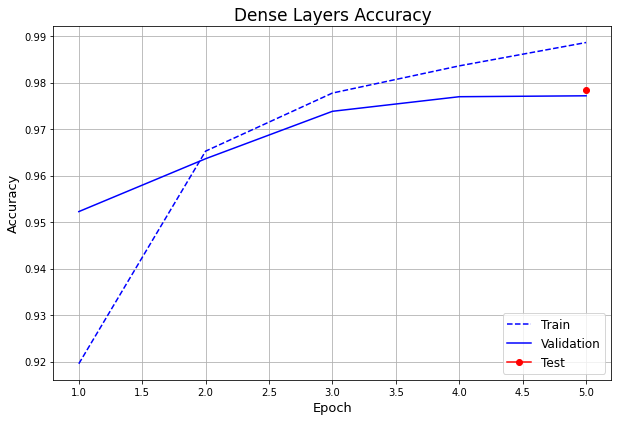

In [0]:
# Visualização do Treinamento/Teste

l = len(dense_history.history['acc'])
epochs = np.linspace(1, l, num=l, dtype=int)

plt.figure(figsize=(10, 6.5))
plt.plot(epochs, dense_history.history['acc'], linestyle='--', color='blue', label='Train')
plt.plot(epochs, dense_history.history['val_acc'], color='blue', label='Validation')
plt.plot([l], [dense_test_acc], marker='o', color='red', label='Test')
plt.grid(b=True)
plt.title('Dense Layers Accuracy', fontsize=17)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.legend(loc='lower right', fontsize='large')
plt.show()

# Modelo Convolucional

In [0]:
# Modelagem da Rede

conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(64, activation='relu'))
conv_model.add(layers.Dense(10, activation='softmax'))
conv_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

conv_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)              

In [0]:
# Preparação dos Dados

(conv_train_img, conv_train_lbl), (conv_test_img, conv_test_lbl) = mnist.load_data()
conv_train_img = conv_train_img.reshape((60000, 28, 28, 1))
conv_train_img = conv_train_img.astype('float32') / 255

conv_test_img = conv_test_img.reshape((10000, 28, 28, 1))
conv_test_img = conv_test_img.astype('float32') / 255

conv_train_lbl = to_categorical(conv_train_lbl)
conv_test_lbl = to_categorical(conv_test_lbl)

In [0]:
# Treinamento da Rede
%%time

conv_history = conv_model.fit(conv_train_img,
                              conv_train_lbl, 
                              epochs=5, 
                              batch_size=64,
                              validation_split=0.17)

Train on 49800 samples, validate on 10200 samples
Epoch 1/5
49800/49800 [==============================] - 9s 183us/step - loss: 0.1960 - acc: 0.9378 - val_loss: 0.0681 - val_acc: 0.9793
Epoch 2/5
49800/49800 [==============================] - 4s 84us/step - loss: 0.0497 - acc: 0.9846 - val_loss: 0.0621 - val_acc: 0.9799
Epoch 3/5
49800/49800 [==============================] - 4s 85us/step - loss: 0.0332 - acc: 0.9897 - val_loss: 0.0450 - val_acc: 0.9885
Epoch 4/5
49800/49800 [==============================] - 4s 84us/step - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0385 - val_acc: 0.9905
Epoch 5/5
49800/49800 [==============================] - 4s 86us/step - loss: 0.0200 - acc: 0.9940 - val_loss: 0.0331 - val_acc: 0.9914
CPU times: user 26.6 s, sys: 2.75 s, total: 29.3 s
Wall time: 26.2 s


In [0]:
conv_train_acc = conv_history.history['acc'][-1]
conv_train_loss = conv_history.history['loss'][-1]
conv_val_acc = conv_history.history['val_acc'][-1]
conv_val_loss = conv_history.history['val_loss'][-1]
(conv_test_loss, conv_test_acc) = conv_model.evaluate(conv_test_img, conv_test_lbl, 32)

print('\nDados do Treinamento')
print('Accuracy: \t{0:.2f}%'.format(conv_train_acc * 100))
print('Loss: \t\t{0:.2f}%'.format(conv_train_loss * 100))
print('\nDados da Validação')
print('Accuracy: \t{0:.2f}%'.format(conv_val_acc * 100))
print('Loss: \t\t{0:.2f}%'.format(conv_val_loss * 100))
print('\nDados do Test')
print('Accuracy: \t{0:.2f}%'.format(conv_test_acc * 100))
print('Loss: \t\t{0:.2f}%'.format(conv_test_loss * 100))

10000/10000 [==============================] - 1s 58us/step

Dados do Treinamento
Accuracy: 	99.40%
Loss: 		2.00%

Dados da Validação
Accuracy: 	99.14%
Loss: 		3.31%

Dados do Test
Accuracy: 	99.31%
Loss: 		2.34%


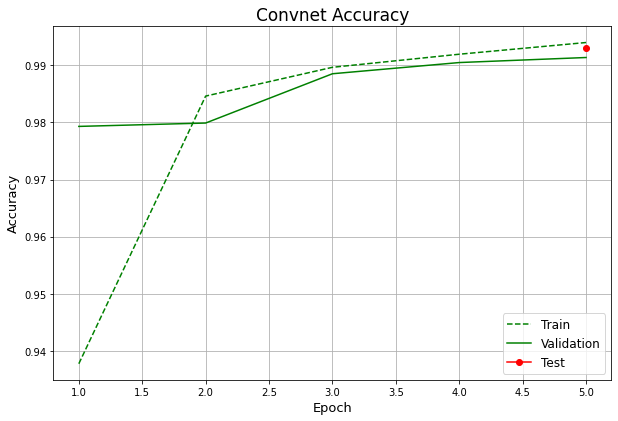

In [0]:
# Visualização do Treinamento/Teste

plt.figure(figsize=(10, 6.5))
plt.plot(epochs, conv_history.history['acc'], linestyle='--', color='green', label='Train')
plt.plot(epochs, conv_history.history['val_acc'], color='green', label='Validation')
plt.plot([l], [conv_test_acc], color='red', marker='o', label='Test')
plt.grid(b=True)
plt.title('Convnet Accuracy', fontsize=17)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.legend(loc='lower right', fontsize='large')
plt.show()

# Comparação entre Modelos

## Gráfico de Acurácia

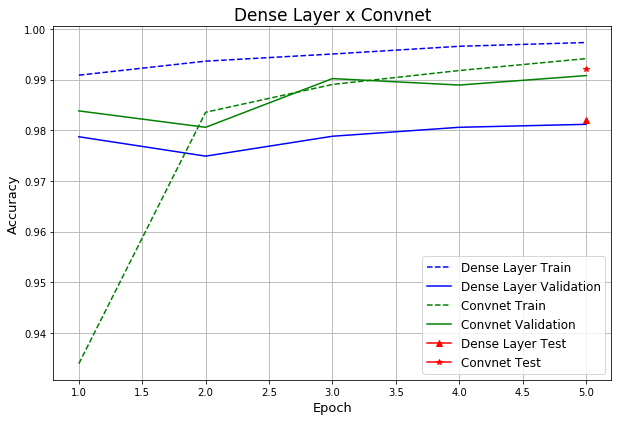

In [0]:
# Comparação Convnet x Dense Layers

plt.figure(figsize=(10, 6.5))
plt.plot(epochs, dense_history.history['acc'], linestyle='--', color='blue', label='Dense Layer Train')
plt.plot(epochs, dense_history.history['val_acc'], color='blue', label='Dense Layer Validation')
plt.plot(epochs, conv_history.history['acc'], linestyle='--', color='green', label='Convnet Train')
plt.plot(epochs, conv_history.history['val_acc'], color='green', label='Convnet Validation')
plt.plot([l], [dense_test_acc], color='red', marker='^', label='Dense Layer Test')
plt.plot([l], [conv_test_acc], color='red', marker='*', label='Convnet Test')
plt.grid(b=True)
plt.title('Dense Layer x Convnet', fontsize=17)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.legend(loc='lower right', fontsize='large')
plt.show()

## Predições usando conjunto de teste

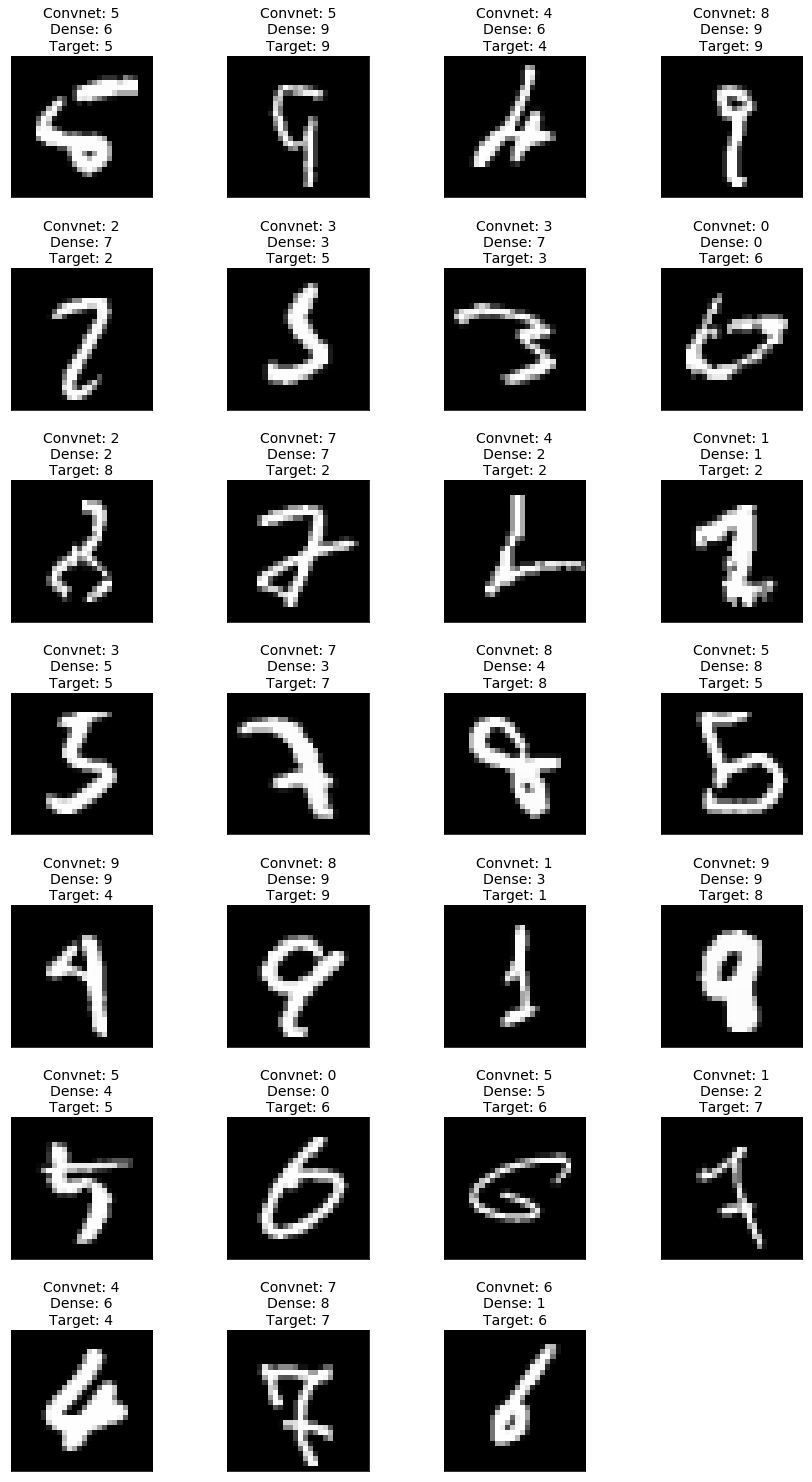

In [0]:
# Comparação de Predições

(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

dense_predict = dense_model.predict_classes(dense_test_img)
conv_predict = conv_model.predict_classes(conv_test_img)

max_samples = 26
idx = []
i = 0

while (i < (len(test_lbl) - 2) and len(idx) <= max_samples):
  if ((dense_predict[i] != test_lbl[i]) or (conv_predict[i] != test_lbl[i])):
    idx.append(i)
  i += 1

figures_per_line = 4
lines = np.ceil(max_samples / figures_per_line)
plt.figure(figsize=(3.72 * figures_per_line, 3.72 * lines))
plt.subplots_adjust(hspace=.5)
i = 0
while (i < len(idx)):
  j = idx[i]
  plt.subplot(lines, figures_per_line, i + 1)
  plt.imshow(test_img[j], cmap=plt.get_cmap('gray'))
  plt.title('Convnet: %s\nDense: %s\nTarget: %s' % 
            (conv_predict[j], dense_predict[j], test_lbl[j]),
            fontsize=14)
  plt.xticks([])
  plt.yticks([])
  i += 1
plt.show()

## Predições usando dados reais

Usando as redes neurais treinadas para prever os dígitos das imagens tiradas por mim.

<br />

Dados:

<img src="https://i.imgur.com/kD2TieH.jpg" alt="drawing" width="150"/>
<img src="https://i.imgur.com/G7yxonu.jpg" alt="drawing" width="150" />
<img src="https://i.imgur.com/JscD1yr.jpg" alt="drawing" width="56"/>
<img src="https://i.imgur.com/4t0gdrO.jpg" alt="drawing" width="56" />


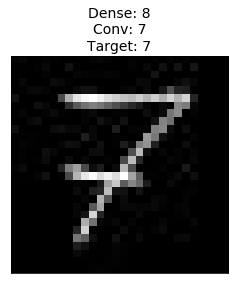

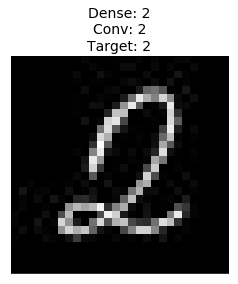

In [0]:
img_urls = [
  'https://i.imgur.com/JscD1yr.jpg',
  'https://i.imgur.com/4t0gdrO.jpg'
]

target_set = [
  7,
  2
]

data_set = []

for url in img_urls:
  response = requests.get(url)
  img = Image.open(BytesIO(response.content)).convert('L')
  pixels = list(img.getdata())
  w, h = img.size
  pixels = [pixels[i * w:(i + 1) * w] for i in range(h)]
  data_set.append(pixels)

data_set = np.array(data_set)
dense_data = data_set.reshape((2, 28 * 28))
dense_data = dense_data.astype('float32') / 255
conv_data = data_set.reshape((2, 28, 28, 1))
conv_data = conv_data.astype('float32') / 255

dense_pred = dense_model.predict_classes(dense_data)
conv_pred = conv_model.predict_classes(conv_data)

for i in range(len(data_set)):
  lbl = 'Dense: %s\nConv: %s\nTarget: %s' % (dense_pred[i], conv_pred[i], target_set[i])
  plt.figure(i)
  plt.xticks([])
  plt.yticks([])
  plt.title(lbl, fontsize=14)
  plt.imshow(data_set[i], cmap='gray')

plt.show()

## Mais:

[http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)